In [ ]:
%tensorflow_version 1.x

import tensorflow.keras as K

TensorFlow 1.x selected.


In [ ]:
def preprocess_data(X, Y):

    X = K.applications.resnet50.preprocess_input(X)
    Y = K.utils.to_categorical(Y, 10)
    return X, Y

In [ ]:
if __name__ == "__main__":
    input_tensor = K.Input(shape=(32, 32, 3))
    (x_train, y_train), (x_test, y_test) = K.datasets.cifar10.load_data()
    x_train, y_train = preprocess_data(x_train, y_train)
    x_test, y_test = preprocess_data(x_test, y_test)
    model_base = K.applications.ResNet101(
                                            include_top=False,
                                            weights="imagenet",
                                            input_tensor=input_tensor)
    model = K.models.Sequential()
    model.add(K.layers.UpSampling2D((8, 8)))
    model.add(model_base)
    model.add(K.layers.Flatten())
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=K.optimizers.Adam(lr=0.00001),
                  loss='categorical_crossentropy',
                  metrics=['acc'])
    history = model.fit(x_train, y_train,
              validation_data=(x_test, y_test),
              batch_size=32,
              epochs=5,
              verbose=1)
    model.save('cifar10.h5')

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 1337s 27ms/sample - loss: 1.0438 - acc: 0.6486 - val_loss: 0.4616 - val_acc: 0.8479
Epoch 2/5
50000/50000 [==============================] - 1327s 27ms/sample - loss: 0.4055 - acc: 0.8630 - val_loss: 0.3233 - val_acc: 0.8938
Epoch 3/5
50000/50000 [==============================] - 1328s 27ms/sample - loss: 0.2507 - acc: 0.9152 - val_loss: 0.2577 - val_acc: 0.9154
Epoch 4/5
50000/50000 [==============================] - 1330s 27ms/sample - loss: 0.1586 - acc: 0.9454 - val_loss: 0.2463 - val_acc: 0.9255
Epoch 5/5
50000/50000 [==============================] - 1325s 26ms/sample - loss: 0.1042 - acc: 0.9642 - val_loss: 0.2346 - val_acc: 0.9285


In [ ]:
K.learning_phase = K.backend.learning_phase

_, (X, Y) = K.datasets.cifar10.load_data()
X_p, Y_p = preprocess_data(X, Y)
model = K.models.load_model('cifar10.h5')
model.evaluate(X_p, Y_p, batch_size=128, verbose=1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


10000/10000 [==============================] - 70s 7ms/sample - loss: 0.2346 - acc: 0.9285


[0.23457414314746858, 0.9285]

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


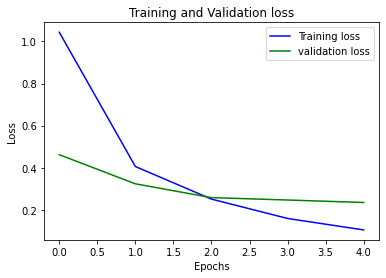

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(len(loss_train))
plt.plot(epochs, loss_train, 'b', label='Training loss')
plt.plot(epochs, loss_val, 'g', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()